### Face Mask Detection with Convolutional Neural Network `(CNN)`

In [2]:
! kaggle datasets download -d omkargurav/face-mask-dataset

In [3]:
#! unzip -q ./face-mask-dataset.zip 

In [4]:
from zipfile import ZipFile

data_ds = './face-mask-dataset.zip'

with ZipFile(data_ds, 'r') as zip:
    zip.extractall()
    print('The data-set is extracted')

The data-set is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from random import seed
from random import randint

In [6]:
# checking if the TensorFlow using GPU
gpus = tf.config.list_physical_devices("GPU")
if gpus:
  for gpu in gpus:
    print("Device name:", gpu.name)
    print("Device type:", gpu.device_type)
else:
  print("No GPU available")

Device name: /physical_device:GPU:0
Device type: GPU


In [7]:
mask_files = os.listdir('./data/with_mask/')
print(mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [8]:
no_mask_files = os.listdir('./data/without_mask/')
print(no_mask_files[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [9]:
# number of photo in our data-set

print(f'Number of mask files: {len(mask_files)}')
print(f'Number of without mask images: {len(no_mask_files)}')

Number of mask files: 3725
Number of without mask images: 3828


In [10]:
# with mask --> 1, without mask --> 0

with_mask_labels = [1]*len(mask_files)
without_mask_labels = [0]*len(no_mask_files)

In [11]:
print(with_mask_labels[0:3])
print(without_mask_labels[0:3])

[1, 1, 1]
[0, 0, 0]


In [12]:
len(without_mask_labels), len(with_mask_labels)

(3828, 3725)

In [13]:
# combin two sub-datasets

labels = with_mask_labels + without_mask_labels

In [14]:
len(labels)

7553

In [15]:
labels[0:5], labels[-5:]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

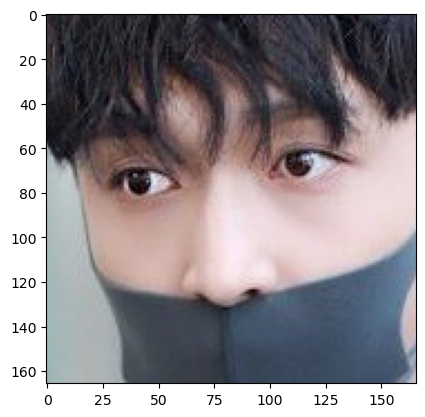

In [16]:
img = mping.imread('./data/with_mask/with_mask_1005.jpg')
imgplot = plt.imshow(img)

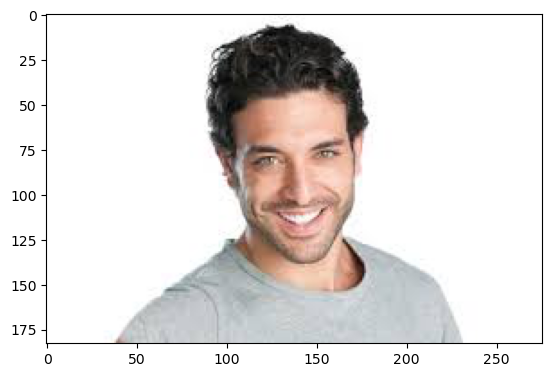

In [17]:
img = mping.imread('./data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

In [18]:
# convert images to numpy arrays
with_mask_path = './data/with_mask/'
data = []

for img_file in mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize(size=(128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

d:\miniconda3\envs\DL\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
without_mask_path = './data/without_mask/'

for img_file in no_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize(size=(128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [20]:
data

[array([[[50, 58, 31],
         [46, 54, 34],
         [56, 59, 42],
         ...,
         [26, 32, 25],
         [29, 33, 18],
         [34, 40, 16]],
 
        [[47, 55, 30],
         [49, 57, 37],
         [59, 63, 40],
         ...,
         [18, 21, 11],
         [38, 42, 31],
         [31, 41, 22]],
 
        [[52, 58, 37],
         [50, 59, 38],
         [59, 64, 36],
         ...,
         [45, 44, 30],
         [29, 35, 28],
         [20, 30, 17]],
 
        ...,
 
        [[63, 72, 37],
         [66, 76, 41],
         [74, 84, 50],
         ...,
         [ 5,  4,  0],
         [20, 19, 15],
         [17, 17, 12]],
 
        [[59, 71, 34],
         [60, 70, 39],
         [68, 76, 50],
         ...,
         [16, 15, 12],
         [15, 13, 10],
         [13,  9,  7]],
 
        [[53, 69, 29],
         [54, 64, 37],
         [57, 63, 43],
         ...,
         [18, 18, 16],
         [16, 13, 12],
         [20, 12, 13]]], dtype=uint8),
 array([[[115,  61,  15],
         [121,  

In [21]:
len(data)

7553

In [22]:
data[1]

array([[[115,  61,  15],
        [121,  65,  18],
        [129,  73,  26],
        ...,
        [ 87,  53,  25],
        [ 87,  53,  28],
        [ 88,  53,  31]],

       [[135,  78,  31],
        [136,  80,  33],
        [132,  75,  29],
        ...,
        [ 78,  44,  17],
        [ 74,  40,  15],
        [ 78,  43,  21]],

       [[124,  68,  21],
        [125,  68,  22],
        [115,  59,  13],
        ...,
        [ 77,  43,  16],
        [ 79,  45,  20],
        [ 78,  43,  21]],

       ...,

       [[175, 135,  69],
        [181, 141,  75],
        [180, 140,  74],
        ...,
        [202, 164,  99],
        [197, 159,  94],
        [186, 147,  82]],

       [[186, 146,  79],
        [185, 144,  77],
        [182, 142,  76],
        ...,
        [208, 170, 103],
        [204, 167, 101],
        [188, 149,  83]],

       [[192, 152,  83],
        [189, 149,  80],
        [183, 142,  75],
        ...,
        [213, 176, 108],
        [214, 177, 109],
        [203, 165,  97]]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
X = np.array(data)
y = np.array(labels)
X.shape, y.shape

((7553, 128, 128, 3), (7553,))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6042, 128, 128, 3), (1511, 128, 128, 3), (6042,), (1511,))

In [28]:
# scaling the data values between 0 and 1
 
X_train = X_train/255
X_test = X_test/255

In [29]:
X_train

array([[[[0.15686275, 0.06666667, 0.05098039],
         [0.16470588, 0.07058824, 0.05490196],
         [0.18039216, 0.07843137, 0.0627451 ],
         ...,
         [0.17647059, 0.11372549, 0.11764706],
         [0.17254902, 0.11372549, 0.1254902 ],
         [0.17254902, 0.11372549, 0.1254902 ]],

        [[0.17254902, 0.07058824, 0.05882353],
         [0.18431373, 0.08235294, 0.06666667],
         [0.21176471, 0.09803922, 0.08235294],
         ...,
         [0.17647059, 0.11764706, 0.12156863],
         [0.17254902, 0.11372549, 0.1254902 ],
         [0.17254902, 0.11372549, 0.1254902 ]],

        [[0.20784314, 0.09019608, 0.07058824],
         [0.22745098, 0.10588235, 0.08627451],
         [0.27058824, 0.14117647, 0.11764706],
         ...,
         [0.17254902, 0.11372549, 0.11764706],
         [0.16862745, 0.10980392, 0.12156863],
         [0.16862745, 0.10980392, 0.12156863]],

        ...,

        [[0.54117647, 0.72941176, 0.64705882],
         [0.52941176, 0.72941176, 0.64313725]

In [30]:
X_test

array([[[[0.28235294, 0.2627451 , 0.24313725],
         [0.34509804, 0.33333333, 0.31764706],
         [0.65490196, 0.65490196, 0.65490196],
         ...,
         [0.82745098, 0.69411765, 0.50588235],
         [0.90980392, 0.78823529, 0.59607843],
         [0.99215686, 0.8745098 , 0.67843137]],

        [[0.2745098 , 0.24705882, 0.23137255],
         [0.37647059, 0.36078431, 0.34509804],
         [0.69019608, 0.68627451, 0.69019608],
         ...,
         [0.80392157, 0.67058824, 0.49019608],
         [0.89803922, 0.77254902, 0.58823529],
         [0.98823529, 0.86666667, 0.68235294]],

        [[0.29019608, 0.25490196, 0.24313725],
         [0.39607843, 0.36470588, 0.35686275],
         [0.69411765, 0.68235294, 0.68627451],
         ...,
         [0.78039216, 0.64705882, 0.47058824],
         [0.88627451, 0.76078431, 0.58431373],
         [0.98431373, 0.8627451 , 0.68235294]],

        ...,

        [[0.24313725, 0.28627451, 0.36862745],
         [0.37647059, 0.40392157, 0.48627451]

In [31]:
NUM_OF_CLASSES = 2

In [32]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(254, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(NUM_OF_CLASSES, activation='sigmoid'))



In [33]:
model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [34]:
model.fit(x=X_train, y=y_train,  epochs=20)

Epoch 1/20
189/189 [==============================] - 21s 64ms/step - loss: 0.5251 - acc: 0.7953
Epoch 2/20
189/189 [==============================] - 11s 60ms/step - loss: 0.2712 - acc: 0.8928
Epoch 3/20
189/189 [==============================] - 11s 60ms/step - loss: 0.2141 - acc: 0.9172
Epoch 4/20
189/189 [==============================] - 11s 60ms/step - loss: 0.1845 - acc: 0.9323
Epoch 5/20
189/189 [==============================] - 12s 63ms/step - loss: 0.1483 - acc: 0.9422
Epoch 6/20
189/189 [==============================] - 13s 67ms/step - loss: 0.1123 - acc: 0.9606
Epoch 7/20
189/189 [==============================] - 13s 70ms/step - loss: 0.0985 - acc: 0.9649
Epoch 8/20
189/189 [==============================] - 13s 67ms/step - loss: 0.0894 - acc: 0.9672
Epoch 9/20
189/189 [==============================] - 13s 67ms/step - loss: 0.0815 - acc: 0.9730
Epoch 10/20
189/189 [==============================] - 13s 68ms/step - loss: 0.0678 - acc: 0.9763
Epoch 11/20
189/189 [========

In [35]:
loss, acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {acc}, and Loss: {loss}')

48/48 [==============================] - 1s 21ms/step - loss: 0.4352 - acc: 0.9424
Test Accuracy: 0.9424222111701965, and Loss: 0.4352237284183502


In [42]:
input_image_path = input('Path of the image to be predicted: ')
img = mping.imread(input_image_path)
input_image = cv2.imread(input_image_path)

In [43]:
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

[[0.996837   0.09258343]]


0
The person in the image is not wearing a mask


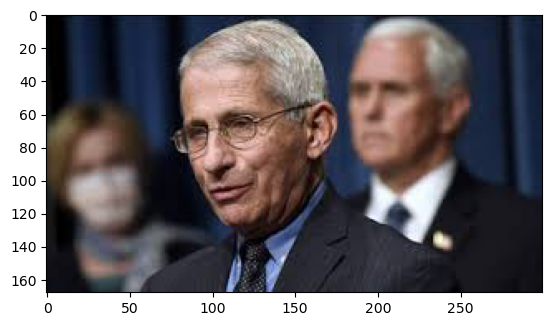

In [44]:
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
imgplot = plt.imshow(img)



if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')